In [1]:
  # STEP 1: Upload the dataset
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


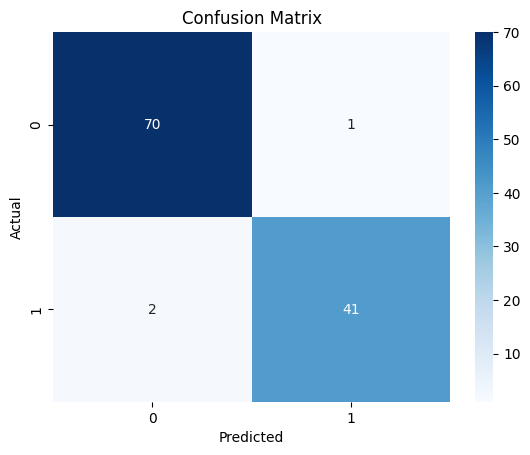

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

ROC AUC Score: 0.99737962659679


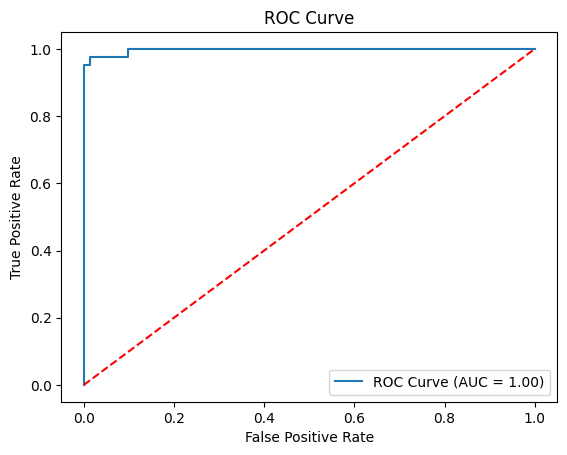

Confusion Matrix (Threshold=0.4):
 [[70  1]
 [ 1 42]]
Classification Report (Threshold=0.4):
               precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [3]:
# STEP 2: Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

# STEP 3: Read dataset (change file name if needed)
df = pd.read_csv('data.csv')  # <-- use the actual uploaded file name
df.head()

# STEP 4: Data Preprocessing
# Drop unnecessary columns (adjust based on your dataset)
df.drop(columns=['id', 'Unnamed: 32'], inplace=True, errors='ignore')

# Convert diagnosis column to binary: M = 1 (Malignant), B = 0 (Benign)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Separate features and labels
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# STEP 5: Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# STEP 6: Train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)
# STEP 7: Predict and evaluate
y_pred = model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# STEP 8: ROC Curve and AUC
y_prob = model.predict_proba(X_test)[:,1]
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC AUC Score:", roc_auc)

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc='lower right')
plt.show()

# STEP 9: Try custom threshold
threshold = 0.4
y_pred_thresh = (y_prob >= threshold).astype(int)

# Evaluation with new threshold
print("Confusion Matrix (Threshold=0.4):\n", confusion_matrix(y_test, y_pred_thresh))
print("Classification Report (Threshold=0.4):\n", classification_report(y_test, y_pred_thresh))
